<a href="https://colab.research.google.com/github/AlessandraSalanitri/Analytics-and-Business-Intelligence/blob/main/Plotting%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting & Visualization
https://matplotlib.org/stable/users/index

https://pandas.pydata.org/docs/user_guide/index.html

https://seaborn.pydata.org/


All libraries needed are imported

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl

%matplotlib inline

To begin plotting and visualization, it is required that the dataset has only reliable and usable data, hence, all duplicates’ values, null values needs to be dropped before.
The code below queries and display all the null values

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

the code below displays duplicate value if any.

In [ ]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

The code below queries to display a raw dataset, then queries to drop duplicate and null values and to display the new information with the clean dataset. The inplace = True, enable the data to be renamed in place.

In [ ]:
print("Before Cleaning:")
print(titanic.info())

# Drop duplicates
titanic.drop_duplicates(inplace=True)

# Drop null values
titanic.dropna(inplace=True)

# Display information about the cleaned dataset
print("\nClean Dataset:")
print(titanic.info())

Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Clean Dataset:
<class 'pandas.core.frame.DataFrame'>
Int

To present an understandable report to Stakeholders and decision maker, our data needs to be as clear as possible. In this dataset, for example, some title are not clear or descriptive such as sibsp, parch, etc.
Below code display columns titles being renamed with descriptive title replacing for example “sibs” title with “siblings or spouse” title.


In [ ]:
titanic.rename( columns = {'pclass' : 'passenger_class' ,
                           'sex' : 'gender' ,
                           'sibsp' : 'siblings_or_spouse' ,
                           'embarked' : 'embark_port',
                           'embark_town' : 'town_embarkation',
                           'parch' : 'parent_or_children',
                           'adult_male' : 'adult',
                           'who' : 'individual'}, inplace = True)

In [ ]:
columns = list(titanic.columns)
print(columns)

['survived', 'passenger_class', 'gender', 'age', 'siblings_or_spouse', 'parent_or_children', 'fare', 'embark_port', 'class', 'individual', 'adult', 'deck', 'town_embarkation', 'alive', 'alone']



The insights revealed in dept from titanic dataset are displayed in an understandable manner thanks to different graphs following.

**Illustrating below the number of individuals who managed to survive.   **

The graph suggest that the higher percentage of individuals survived the tragedy and a lower percentage did not survived.

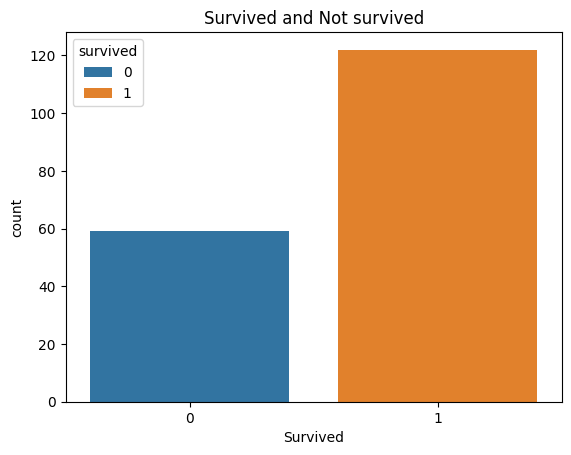

In [ ]:
sns.countplot(x='survived', hue='survived',data=titanic)
plt.title("Survived and Not survived")
plt.xlabel("Survived")
plt.show()

The visualization below analyses the
**survival rate between male individual and female individual.**
The graph show clearly that female had higher rate of survival during Titanic

Text(0.5, 1.0, 'Survived Passenger by Gender')

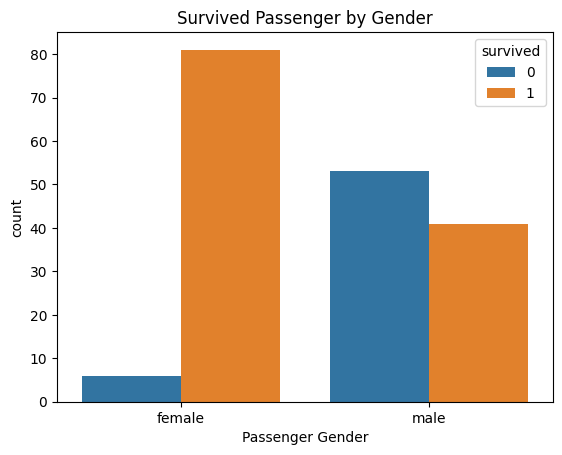

In [ ]:
sns.countplot(x='gender', hue='survived',data=titanic)
#plt.ylabel('Survived')
plt.xlabel('Passenger Gender')

plt.title('Survived Passenger by Gender')

The next graph analyses the passenger class and the survival rate.

The graph clearly suggest an exponential difference of survival rate base on the class each passenger was traveling in.


Text(0.5, 0, 'Passenger Class')

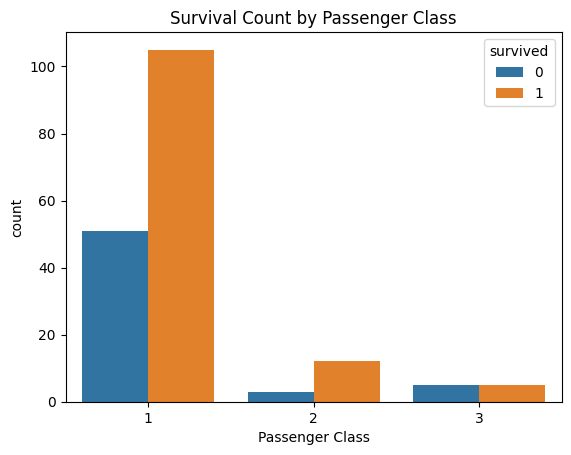

In [ ]:
sns.countplot(x='passenger_class', hue='survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
#plt.ylabel('Count')

Box plot is used to display the minimum, the maximum, the median and outliers of the age variable among each passenger class.
The graph helps to easy compare the tendency and potential outliers within each class and could help identify patterns or differences in age distribution.

Below graph shows the passengers travelling in first class had an average of 38 years old,with the minimum number being 1 years old and the maximum being 80 years old. The second class passengers had an average of 30 years old, with the minimum age being 2 years old and the maximum being 58 years old.The third class passenger had an average of 25 years old, with the minimum age being 3 years old and the maximum 42 years old.

Text(0.5, 0, 'Passenger Class')

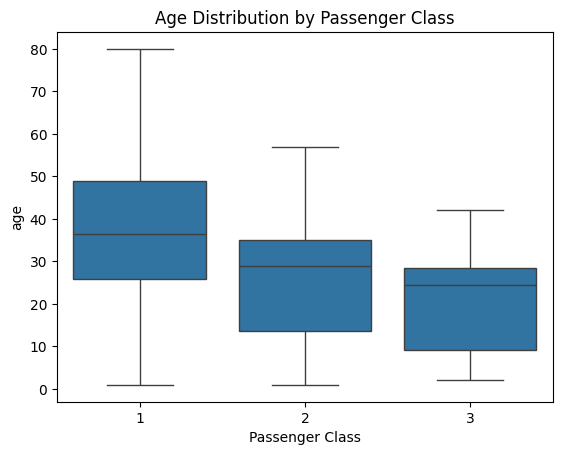

In [ ]:
sns.boxplot(x='passenger_class', y='age', data=titanic)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')


The graph below shows the relationship between variable “age” and “variable” fare.
It is suggested a strong correlation between the two data points.


Text(0.5, 1.0, 'Scatter Plot of Age vs. Fare')

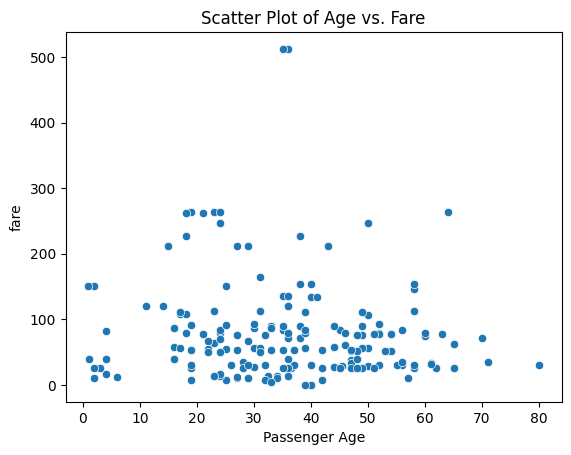

In [ ]:
sns.scatterplot(x='age', y='fare', data=titanic)
plt.xlabel('Passenger Age')
#plt.ylabel('Ticket Fare')
plt.title('Scatter Plot of Age vs. Fare')


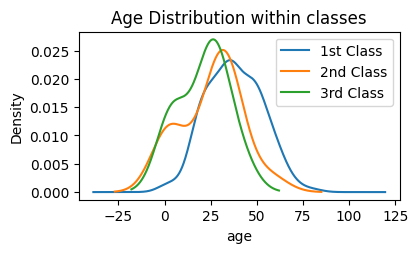

In [ ]:
#lineplot
plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
# kde = kernel.It is a function to generate kernel density
titanic.age[titanic.passenger_class == 1].plot(kind='kde')
titanic.age[titanic.passenger_class == 2].plot(kind='kde')
titanic.age[titanic.passenger_class == 3].plot(kind='kde')
 # axis lable
plt.xlabel("age")
plt.title("Age Distribution within classes")
# legend
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

<ipython-input-13-2c2790012e6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Passenger_Status', data=titanic, palette='viridis')


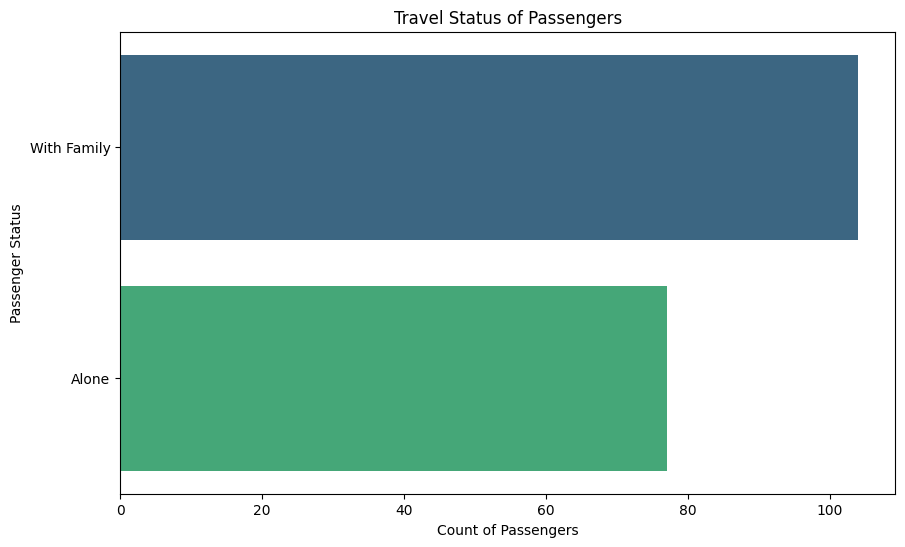

In [ ]:
titanic['Passenger_Status'] = 'Alone'
titanic.loc[(titanic['siblings_or_spouse'] > 0) | (titanic['parent_or_children'] > 0), 'Passenger_Status'] = 'With Family'

plt.figure(figsize=(10, 6))

sns.countplot(y='Passenger_Status', data=titanic, palette='viridis')

plt.ylabel('Passenger Status')
plt.xlabel('Count of Passengers')
plt.title('Travel Status of Passengers')
plt.show()

In [ ]:
titanic.to_csv('TitanicEX.csv')